<a href="https://colab.research.google.com/github/Mingyang0816/Startup-Founders-Graph-Analysis/blob/main/Graph_Analysis_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Analysis II Notebook

*   Created **multi-graph** to analyze the collaboration relationships among startup founders and other researchers, up to one degree of separation. If two researchers collaborated on the same journal, an edge links the two nodes together.
*   Analyzed the top 10 researchers **most frequently collaborated** with by each founder.

In [ ]:
!pip install pyvis

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import networkx as nx
from pyvis.network import Network
import IPython
from IPython.core.display import display, HTML

# Entrepreneurs

In [ ]:
# Load entre publications data
entre_pubs = pd.read_excel("entrepreneur_pubs.xlsx")

In [ ]:
# Convert year to strings
entre_pubs["year"] = entre_pubs["year"].astype(str)
entre_pubs.head(5)

,researcher,title,authors,position,publication,year,num_citations,citation_link
0,Emily Leproust,Solution hybrid selection with ultra-long olig...,"['A Gnirke', 'A Melnikov', 'J Maguire', 'P Rog...",5,Nature biotechnology 27,2009,1736,https://scholar.google.com/scholar?oi=bibs&hl=...
1,Emily Leproust,The DNA-encoded nucleosome organization of a e...,"['N Kaplan', 'IK Moore', 'Y Fondufe-Mittendorf...",7,Nature 458,2009,1430,https://scholar.google.com/scholar?oi=bibs&hl=...
2,Emily Leproust,Targeted and genome-scale strategies reveal ge...,"['MP Ball', 'JB Li', 'Y Gao', 'JH Lee', 'EM Le...",5,Nature biotechnology 27,2009,1243,https://scholar.google.com/scholar?oi=bibs&hl=...
3,Emily Leproust,"Towards practical, high-capacity, low-maintena...","['N Goldman', 'P Bertone', 'S Chen', 'C Dessim...",6,Nature 494,2013,1219,https://scholar.google.com/scholar?oi=bibs&hl=...
4,Emily Leproust,Mapping long-range promoter contacts in human ...,"['B Mifsud', 'F Tavares-Cadete', 'AN Young', '...",7,Nature genetics 47,2015,1023,https://scholar.google.com/scholar?oi=bibs&hl=...


In [ ]:
# Convert authors column to lists
entre_pubs["authors"] = entre_pubs["authors"].apply(lambda x: ast.literal_eval(x))
entre_pubs.head(5)

,researcher,title,authors,position,publication,year,num_citations,citation_link
0,Emily Leproust,Solution hybrid selection with ultra-long olig...,"[A Gnirke, A Melnikov, J Maguire, P Rogov, EM ...",5,Nature biotechnology 27,2009,1736,https://scholar.google.com/scholar?oi=bibs&hl=...
1,Emily Leproust,The DNA-encoded nucleosome organization of a e...,"[N Kaplan, IK Moore, Y Fondufe-Mittendorf, AJ ...",7,Nature 458,2009,1430,https://scholar.google.com/scholar?oi=bibs&hl=...
2,Emily Leproust,Targeted and genome-scale strategies reveal ge...,"[MP Ball, JB Li, Y Gao, JH Lee, EM LeProust, I...",5,Nature biotechnology 27,2009,1243,https://scholar.google.com/scholar?oi=bibs&hl=...
3,Emily Leproust,"Towards practical, high-capacity, low-maintena...","[N Goldman, P Bertone, S Chen, C Dessimoz, EM ...",6,Nature 494,2013,1219,https://scholar.google.com/scholar?oi=bibs&hl=...
4,Emily Leproust,Mapping long-range promoter contacts in human ...,"[B Mifsud, F Tavares-Cadete, AN Young, R Sugar...",7,Nature genetics 47,2015,1023,https://scholar.google.com/scholar?oi=bibs&hl=...


In [ ]:
def create_entre_initials(name):

    if name == "Emily Leproust":
        return "EM LeProust"

    elif name == "Jonathan D Steckbeck":
        return "JD Steckbeck"

    elif name == "Stephen Balaban":
        return "S Balaban"

    elif name == "William Red Whittaker":
        return "W Whittaker"

    elif name == "Ross Diankov":
        return "R Diankov"

    elif name == "Chris Urmson":
        return "C Urmson"

In [ ]:
# Create column for author initials
entre_pubs["initials"] = entre_pubs["researcher"].apply(create_entre_initials)

In [ ]:
def clean_authors(row):
    '''
    Replace author's full name with author's initials

    Parameters
    ----------
    row: dictionary representing a row in the df

    Return
    ------
    row: updated dictionary with author's full name replaced with author's initials

    '''

    # Extract author's last name
    name = row["researcher"]
    last_name = name.split()[-1]

    # Replace last name with initials
    row["authors"] = [author for author in row["authors"] if last_name.lower() not in author.lower()]
    row["authors"].append(row["initials"])

    return row

In [ ]:
# Replace author's full name with initials
entre_pubs = entre_pubs.apply(clean_authors, axis = 1)

In [ ]:
entre_pubs.shape

(411, 9)

In [ ]:
# Remove duplicate journals
entre_authors_df = entre_pubs.copy()
entre_authors_df = entre_authors_df.drop_duplicates(subset = ["title"])
entre_authors_df.shape

(373, 9)

In [ ]:
# Filter journals with more than 1 author
entre_authors_df = entre_authors_df[entre_authors_df["authors"].apply(lambda x: len(x) > 1)]
entre_authors_df.shape

(351, 9)

In [ ]:
# Extract relevant columns
entre_authors_df = entre_authors_df[["title", "authors", "num_citations"]]
entre_authors_df.head()

,title,authors,num_citations
0,Solution hybrid selection with ultra-long olig...,"[A Gnirke, A Melnikov, J Maguire, P Rogov, W B...",1736
1,The DNA-encoded nucleosome organization of a e...,"[N Kaplan, IK Moore, Y Fondufe-Mittendorf, AJ ...",1430
2,Targeted and genome-scale strategies reveal ge...,"[MP Ball, JB Li, Y Gao, JH Lee, IH Park, B Xie...",1243
3,"Towards practical, high-capacity, low-maintena...","[N Goldman, P Bertone, S Chen, C Dessimoz, B S...",1219
4,Mapping long-range promoter contacts in human ...,"[B Mifsud, F Tavares-Cadete, AN Young, R Sugar...",1023


In [ ]:
# Convert df to dictionary
entres = entre_authors_df.to_dict(orient = "records")
len(entres)

351

In [ ]:
entres[0]

{'title': 'Solution hybrid selection with ultra-long oligonucleotides for massively parallel targeted sequencing',
 'authors': ['A Gnirke',
  'A Melnikov',
  'J Maguire',
  'P Rogov',
  'W Brockman',
  'EM LeProust'],
 'num_citations': 1736}

In [ ]:
def create_multigraph(journals_dict):
    '''
    Create multigraph with nodes representing authors, and edges representing
    collaborations between pairs of authors on the same journal

    Parameters
    ----------
    journals_dict: dictionary of journals

    Return
    ------
    G: multigraph representing author collaborations

    '''

    # Create multigraph
    G = nx.MultiGraph()

    # Create edge for each pair of authors who have collaborated
    for journal in journals_dict:
        for i in range(0, len(journal["authors"]) - 1):
            for j in range(i + 1, len(journal["authors"])):
                G.add_edge(journal["authors"][i], journal["authors"][j], title = journal["title"], cit = journal["num_citations"])

    print("Number of nodes in this multigraph =", G.number_of_nodes())
    print("Number of edges in this multigraph =", G.number_of_edges())

    return G

In [ ]:
entre_graph = create_multigraph(entres)

Number of nodes in this multigraph = 679
Number of edges in this multigraph = 3676


In [ ]:
def most_colabs(graph):
    '''
    Calculate pairs of authors with highest number of collaborations

    Parameters
    ----------
    graph: multigraph representing author collaborations

    '''

    # Create dict of author pairs
    colabs = {}

    # Calculate number of collaborations for each pairs
    for edge in graph.edges():
        colabs[edge[0] + " and " + edge[1]] = graph.number_of_edges(edge[0], edge[1])

    # Rank by number of collaborations (descending)
    sorted_colabs = sorted(colabs.items(), key = lambda kv: kv[1], reverse = True)
    for i in range(20):
        print(sorted_colabs[i][0], ":", sorted_colabs[i][1])

In [ ]:
most_colabs(entre_graph)

EM LeProust and BJ Peck : 32
C Urmson and W Whittaker : 17
JD Steckbeck and RC Montelaro : 15
W Whittaker and D Wettergreen : 14
W Whittaker and D Apostolopoulos : 14
JD Steckbeck and JK Craigo : 12
JD Steckbeck and D Huang : 10
EM LeProust and X Gao : 9
JD Steckbeck and F Lee : 9
JD Steckbeck and H Holste : 9
F Lee and H Holste : 9
C Urmson and YW Seo : 9
W Whittaker and B Shamah : 9
EM LeProust and B Xie : 8
EM LeProust and H Zhang : 8
EM LeProust and P Yu : 8
JD Steckbeck and B Deslouches : 8
C Urmson and D Wettergreen : 8
W Whittaker and D Kohanbash : 8
J Kuffner and R Diankov : 8


In [ ]:
def author_pair_cit(graph):
    '''
    Calculate pairs of authors with highest number of citations

    Parameters
    ----------
    graph: multigraph representing author collaborations

    Return
    ------
    cit: dictionary with tuples of author pairs being keys,
         and number of citations being values
    '''

    # Create dict of author pairs
    cit = {}

    # All possible author pairs
    for u, v, data in graph.edges(data = True):
        author_pair = tuple(sorted((u, v)))

        # Increment number of citations
        if author_pair in cit:
            cit[author_pair] += data["cit"]
        else:
            cit[author_pair] = data["cit"]

    # Rank by number of citations (descending)
    sorted_cits = sorted(cit.items(), key = lambda kv: kv[1], reverse = True)
    for i in range(20):
        print(sorted_cits[i][0], ":", sorted_cits[i][1])

    return cit

In [ ]:
entre_cit = author_pair_cit(entre_graph)

('B Xie', 'EM LeProust') : 3613
('C Urmson', 'W Whittaker') : 3478
('EM LeProust', 'JB Li') : 3336
('B Xie', 'JB Li') : 2953
('C Baker', 'C Urmson') : 2946
('C Urmson', 'J Anhalt') : 2825
('C Baker', 'W Whittaker') : 2738
('C Urmson', 'J Dolan') : 2598
('C Baker', 'J Dolan') : 2598
('J Dolan', 'W Whittaker') : 2598
('J Anhalt', 'W Whittaker') : 2591
('C Urmson', 'D Bagnell') : 2426
('C Urmson', 'R Bittner') : 2426
('C Urmson', 'MN Clark') : 2426
('D Bagnell', 'J Anhalt') : 2426
('C Baker', 'J Anhalt') : 2426
('J Anhalt', 'R Bittner') : 2426
('J Anhalt', 'MN Clark') : 2426
('J Anhalt', 'J Dolan') : 2426
('C Baker', 'D Bagnell') : 2426


In [ ]:
def colab_cit(author_pairs):
    '''
    Store pairs of authors who have collaborated, and corresponding number of citations.

    Parameters
    ----------
    author_pairs: dictionary with tuples of author pairs being keys,
                  and number of citations being values

    Return
    ------
    colab_cit: dictionary with author name being keys, and
               list of tuples (collaborator, number of citations) being values
    '''

    # Create empty dict
    colab_cit = {}

    for (author_1, author_2), cit in author_pairs.items():

        # Add author name as keys
        if author_1 not in colab_cit:
            colab_cit[author_1] = []
        if author_2 not in colab_cit:
            colab_cit[author_2] = []

        # Add (collaborator, num_cit) as values
        colab_cit[author_1].append((author_2, cit))
        colab_cit[author_2].append((author_1, cit))

    return colab_cit

In [ ]:
entre_colab_cit = colab_cit(entre_cit)

In [ ]:
entres = ["EM LeProust", "JD Steckbeck", "C Urmson", "W Whittaker", "R Diankov"]

In [ ]:
def plot_freq_colabs(num_colabs, colab_cit, authors, num_rows, num_cols, figsize):
    '''
    Plot most successful collaborators for each author (in terms of number of citations).

    Parameters
    ----------
    num_colabs: number of collaborators displayed for each author
    colab_cit: dictionary with author name being keys, and
               list of tuples (collaborator, number of citations) being values
    authors: list of author names
    num_rows: number of rows of subplots
    num_cols: number of columns of subplots
    figsize: tuple indicating width and height of plot

    '''

    # Create base figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)

    # Flatten array of subplot axes
    axes = axes.flatten()

    for idx, author in enumerate(authors):

        if author in colab_cit:

            # Determine most successful collaborators
            sorted_colabs = sorted(colab_cit[author], key = lambda x: x[1], reverse = True)
            top_colabs = sorted_colabs[:num_colabs]

            # Extract name of collaborator and citation count
            names = [entre for entre, num_cit in top_colabs]
            cit_counts = [num_cit for entre, num_cit in top_colabs]

            # Create bar plot
            axes[idx].bar(names, cit_counts, color = "skyblue")
            axes[idx].set_xlabel("Collaborator")
            axes[idx].set_ylabel("Total Citations")
            axes[idx].set_title(f"Top 5 Collaborators for {author}")
            axes[idx].tick_params(axis = "x", rotation = 45)

    for j in range(len(authors), len(axes)):
        axes[j].axis('off')

    plt.subplots_adjust(hspace = 0.3)
    plt.show()

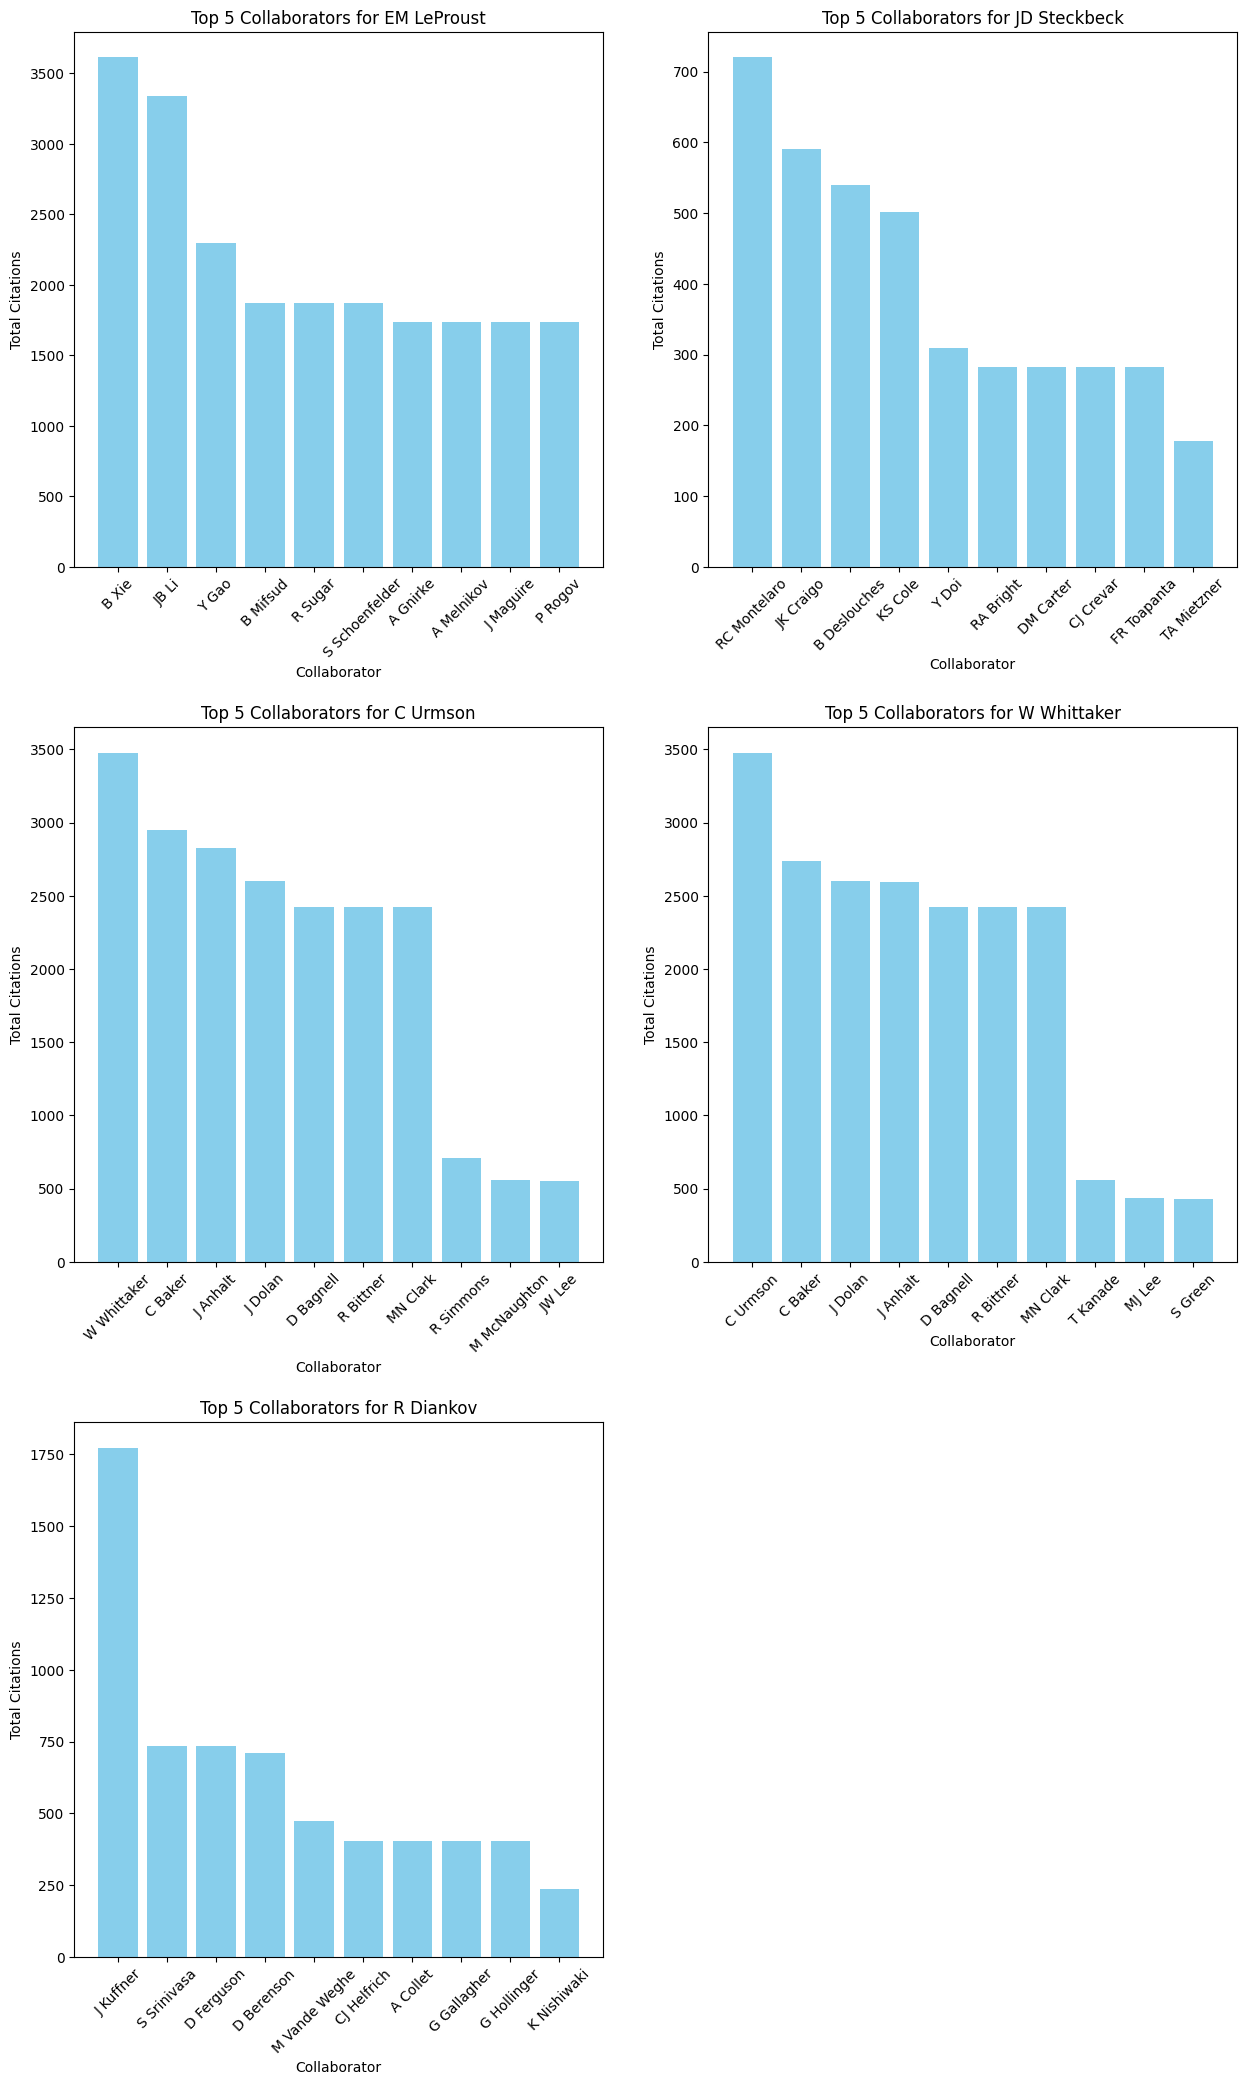

In [ ]:
plot_freq_colabs(10, entre_colab_cit, entres, 3, 2, (15, 25))

In [ ]:
# Create interactive graph
net = Network(notebook = True, cdn_resources = "in_line")
net.from_nx(entre_graph)
net.show("network.html")
IPython.display.HTML("network.html")

network.html


# Founders

In [ ]:
# Load founder publications data
founder_pubs = pd.read_excel("founder_pubs.xlsx")

In [ ]:
# Convert year to strings
founder_pubs["year"] = founder_pubs["year"].astype(str)
founder_pubs.head(5)

,researcher,title,authors,position,publication,year,num_citations,citation_link
0,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,"['AB Zylstra', 'OA Hurricane', 'DA Callahan', ...",7,Nature 601,2022,400,https://scholar.google.com/scholar?oi=bibs&hl=...
1,Leonard Charles Jarrott,Constraints on sub-GeV dark-matter–electron sc...,"['P Agnes', 'IFM Albuquerque', 'T Alexander', ...",7,Physical review letters 121,2018,274,https://scholar.google.com/scholar?oi=bibs&hl=...
2,Leonard Charles Jarrott,Lawson criterion for ignition exceeded in an i...,"['H Abu-Shawareb', 'R Acree', 'P Adams', 'J Ad...",7,Physical review letters 129,2022,271,https://scholar.google.com/scholar?oi=bibs&hl=...
3,Leonard Charles Jarrott,Focusing of short-pulse high-intensity laser-a...,"['T Bartal', 'ME Foord', 'C Bellei', 'MH Key',...",7,Nature Physics 8,2012,170,https://scholar.google.com/scholar?oi=bibs&hl=...
4,Leonard Charles Jarrott,Design of inertial fusion implosions reaching ...,"['AL Kritcher', 'CV Young', 'HF Robey', 'CR We...",7,Nature Physics 18,2022,136,https://scholar.google.com/scholar?oi=bibs&hl=...


In [ ]:
# Convert authors column to lists
founder_pubs["authors"] = founder_pubs["authors"].apply(lambda x: ast.literal_eval(x))
founder_pubs.head(5)

,researcher,title,authors,position,publication,year,num_citations,citation_link
0,Leonard Charles Jarrott,Burning plasma achieved in inertial fusion,"[AB Zylstra, OA Hurricane, DA Callahan, AL Kri...",7,Nature 601,2022,400,https://scholar.google.com/scholar?oi=bibs&hl=...
1,Leonard Charles Jarrott,Constraints on sub-GeV dark-matter–electron sc...,"[P Agnes, IFM Albuquerque, T Alexander, AK Alt...",7,Physical review letters 121,2018,274,https://scholar.google.com/scholar?oi=bibs&hl=...
2,Leonard Charles Jarrott,Lawson criterion for ignition exceeded in an i...,"[H Abu-Shawareb, R Acree, P Adams, J Adams, B ...",7,Physical review letters 129,2022,271,https://scholar.google.com/scholar?oi=bibs&hl=...
3,Leonard Charles Jarrott,Focusing of short-pulse high-intensity laser-a...,"[T Bartal, ME Foord, C Bellei, MH Key, KA Flip...",7,Nature Physics 8,2012,170,https://scholar.google.com/scholar?oi=bibs&hl=...
4,Leonard Charles Jarrott,Design of inertial fusion implosions reaching ...,"[AL Kritcher, CV Young, HF Robey, CR Weber, AB...",7,Nature Physics 18,2022,136,https://scholar.google.com/scholar?oi=bibs&hl=...


In [ ]:
def create_founder_initials(name):

    if name == "Leonard Charles Jarrott":
        return "LC Jarrott"

    elif name == "Austin Draycott":
        return "AS Draycott"

    elif name == "David Weinberg":
        return "DE Weinberg"

    elif name == "Christopher R Carlson":
        return "CR Carlson"

    elif name == "Margaret Kocherga":
        return "M Kocherga"

    elif name == "Felix Wong":
        return "F Wong"

    elif name == "Maxwell Z Wilson":
        return "MZ Wilson"

    elif name == "Daniele Foresti":
        return "D Foresti"

    elif name == "Stuart Diller":
        return "S Diller"

    elif name == "Galen Clark Haynes":
        return "GC Haynes"

    elif name == "Jason Fontana":
        return "J Fontana"

    elif name == "Narek Melik-Barkhudarov":
        return "N Melik-Barkhudarov"

    elif name == "Cole J. T. Lewis":
        return "CJT Lewis"

    elif name == "Mitchell Hsing":
        return "M Hsing"

    elif name == "David Sparkman-Yager":
        return "D Sparkman-Yager"

In [ ]:
# Create column for author initials
founder_pubs["initials"] = founder_pubs["researcher"].apply(create_founder_initials)

In [ ]:
# Replace author's full name with initials
founder_pubs = founder_pubs.apply(clean_authors, axis = 1)

In [ ]:
founder_pubs.shape

(341, 9)

In [ ]:
# Remove duplicate journals
founder_authors_df = founder_pubs.copy()
founder_authors_df = founder_authors_df.drop_duplicates(subset = ["title"])
founder_authors_df.shape

(327, 9)

In [ ]:
# Filter journals with more than 1 author
founder_authors_df = founder_authors_df[founder_authors_df["authors"].apply(lambda x: len(x) > 1)]
founder_authors_df.shape

(311, 9)

In [ ]:
# Extract relevant columns
founder_authors_df = founder_authors_df[["title", "authors", "num_citations"]]
founder_authors_df.head()

,title,authors,num_citations
0,Burning plasma achieved in inertial fusion,"[AB Zylstra, OA Hurricane, DA Callahan, AL Kri...",400
1,Constraints on sub-GeV dark-matter–electron sc...,"[P Agnes, IFM Albuquerque, T Alexander, AK Alt...",274
2,Lawson criterion for ignition exceeded in an i...,"[H Abu-Shawareb, R Acree, P Adams, J Adams, B ...",271
3,Focusing of short-pulse high-intensity laser-a...,"[T Bartal, ME Foord, C Bellei, MH Key, KA Flip...",170
4,Design of inertial fusion implosions reaching ...,"[AL Kritcher, CV Young, HF Robey, CR Weber, AB...",136


In [ ]:
# Convert df to dictionary
founders = founder_authors_df.to_dict(orient = "records")
len(founders)

311

In [ ]:
founders[0]

{'title': 'Burning plasma achieved in inertial fusion',
 'authors': ['AB Zylstra',
  'OA Hurricane',
  'DA Callahan',
  'AL Kritcher',
  'JE Ralph',
  'HF Robey',
  'LC Jarrott'],
 'num_citations': 400}

In [ ]:
# Create multigraph
founder_graph = create_multigraph(founders)

Number of nodes in this multigraph = 739
Number of edges in this multigraph = 4253


In [ ]:
# Most frequent collaborators
most_colabs(founder_graph)

LC Jarrott and MS Wei : 14
D Poulikakos and D Foresti : 14
LC Jarrott and T Ma : 13
LC Jarrott and FN Beg : 13
JE Ralph and LC Jarrott : 11
GC Haynes and DE Koditschek : 11
LC Jarrott and ME Foord : 10
LC Jarrott and C McGuffey : 10
LC Jarrott and PK Patel : 10
LC Jarrott and T Bartal : 9
LC Jarrott and LR Benedetti : 9
LC Jarrott and S Chawla : 9
LC Jarrott and RF Heeter : 9
OA Hurricane and LC Jarrott : 8
LC Jarrott and AA Solodov : 8
LC Jarrott and RB Stephens : 8
LC Jarrott and H Chen : 8
LC Jarrott and MB Schneider : 8
LC Jarrott and A Sorokovikova : 8
MZ Wilson and E Valois : 8


In [ ]:
# Most successful collaborators
founder_cit = author_pair_cit(founder_graph)

('D Foresti', 'D Poulikakos') : 998
('AA Rizzi', 'GC Haynes') : 983
('N Alhusaini', 'V Presnyak') : 972
('V Presnyak', 'YH Chen') : 972
('S Martin', 'V Presnyak') : 972
('N Morris', 'V Presnyak') : 972
('N Kline', 'V Presnyak') : 972
('S Olson', 'V Presnyak') : 972
('DE Weinberg', 'V Presnyak') : 972
('N Alhusaini', 'YH Chen') : 972
('N Alhusaini', 'S Martin') : 972
('N Alhusaini', 'N Morris') : 972
('N Alhusaini', 'N Kline') : 972
('N Alhusaini', 'S Olson') : 972
('DE Weinberg', 'N Alhusaini') : 972
('S Martin', 'YH Chen') : 972
('N Morris', 'YH Chen') : 972
('N Kline', 'YH Chen') : 972
('S Olson', 'YH Chen') : 972
('DE Weinberg', 'YH Chen') : 972


In [ ]:
founder_colab_cit = colab_cit(founder_cit)

In [ ]:
founders = ["LC Jarrott", "DE Weinberg", "CR Carlson", "M Kocherga", "F Wong", "MZ Wilson", "D Foresti", "S Diller", "GC Haynes", "J Fontana"]

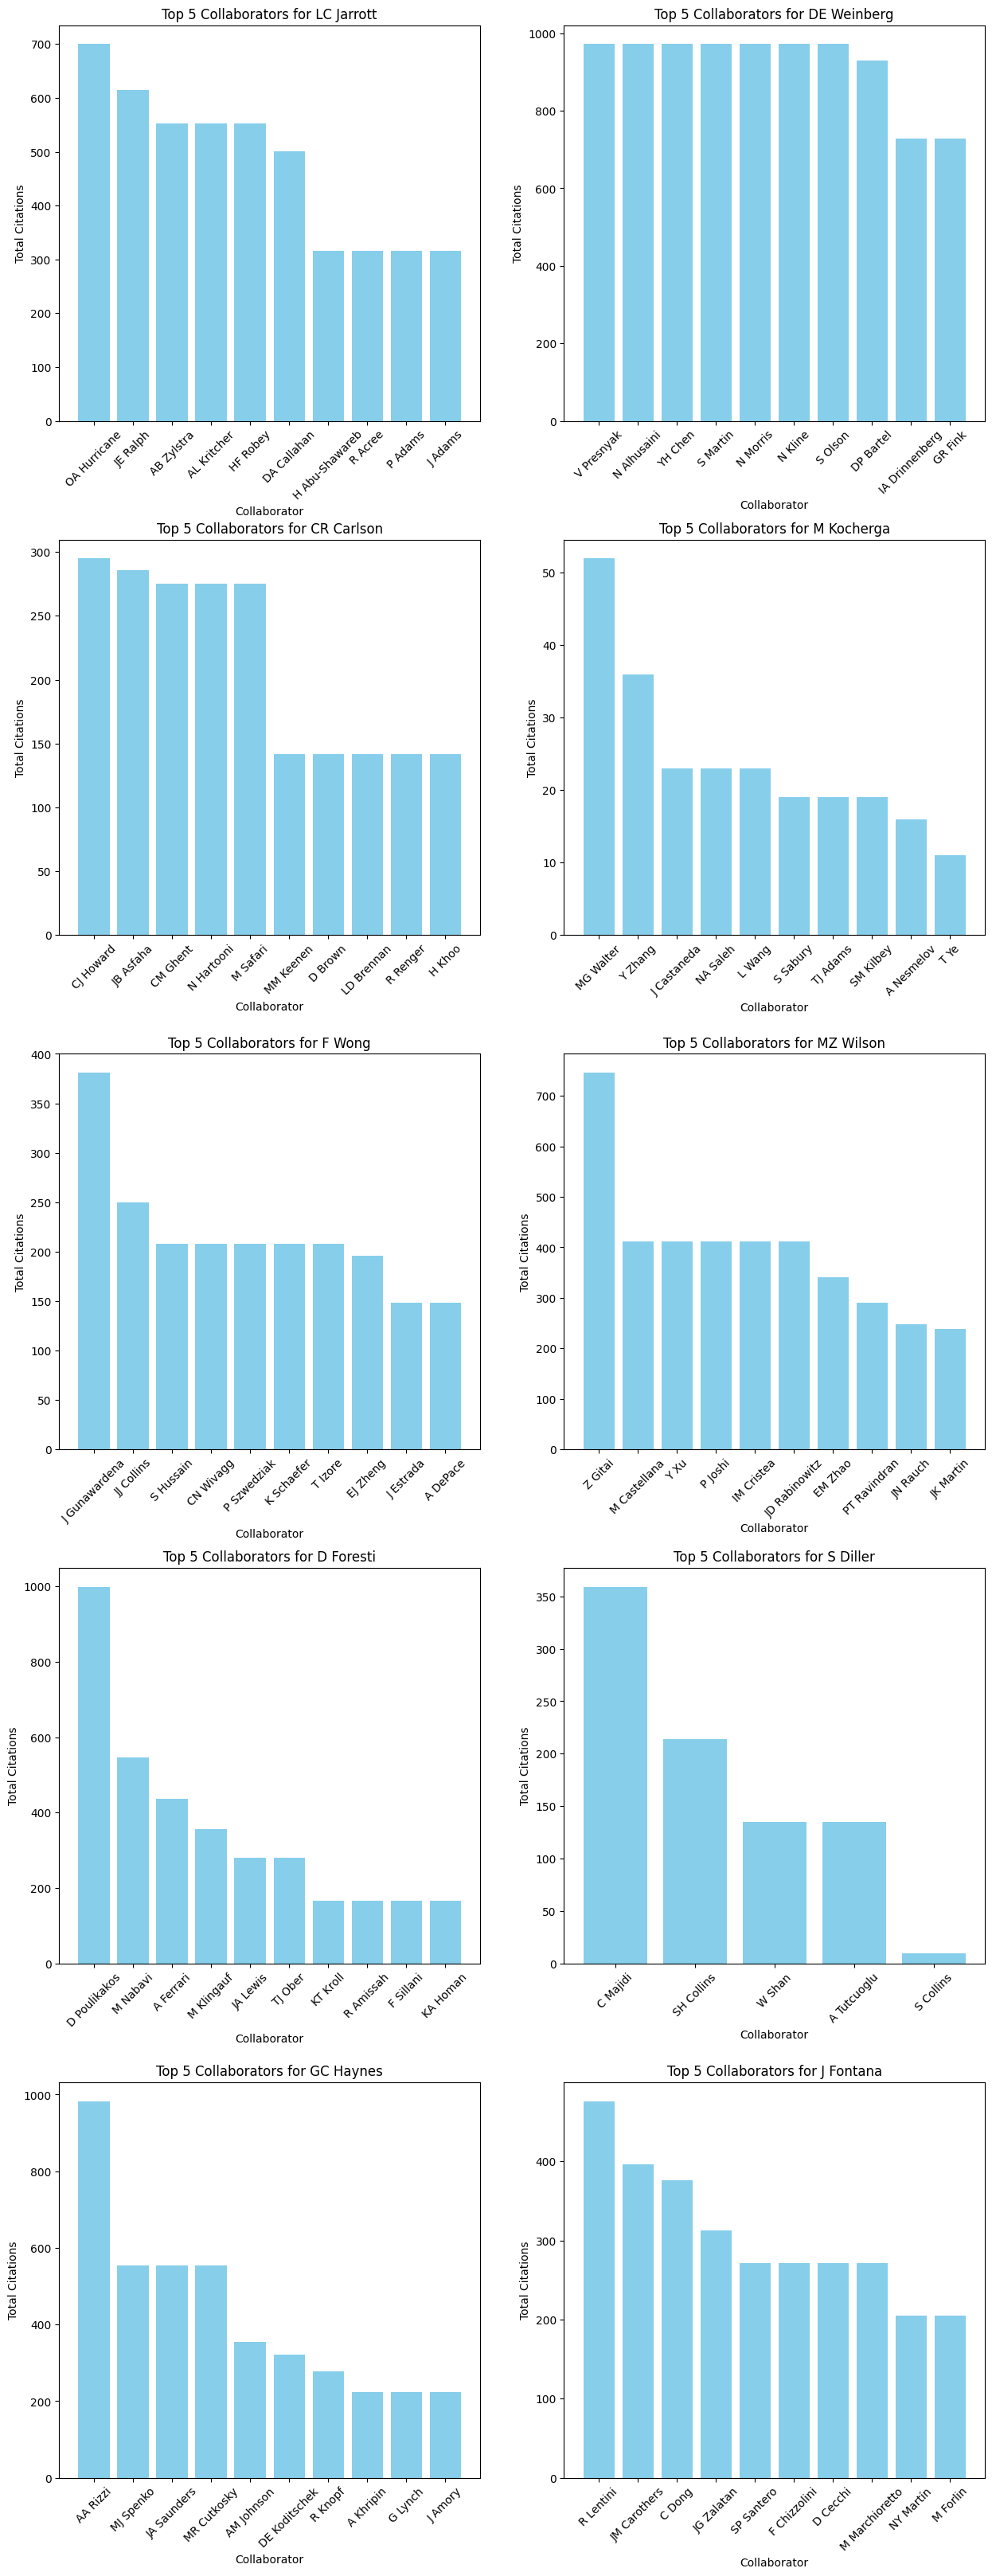

In [ ]:
plot_freq_colabs(10, founder_colab_cit, founders, 5, 2, (15, 40))

In [ ]:
# Create interactive graph
net = Network(notebook = True, cdn_resources = "in_line")
net.from_nx(founder_graph)
net.show("network.html")
IPython.display.HTML("network.html")

network.html
